In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Sea Level Predictor


Text(0.5, 0, '*Per data from the Commonwealth Scientific and Industrial Research Organisation (CSIRO)')

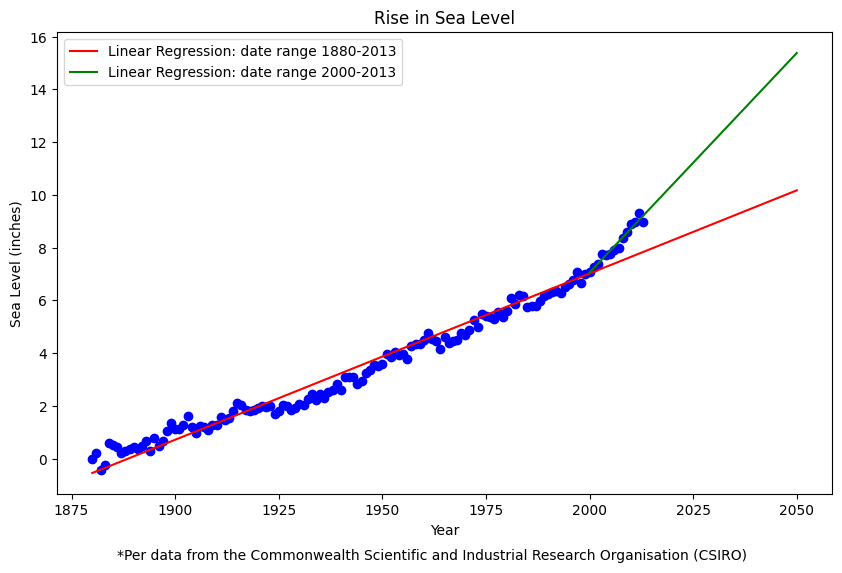

In [2]:
df = pd.read_csv("epa-sea-level.csv")
df = df[['Year', 'CSIRO Adjusted Sea Level']]

beta_one, beta_zero, r_val, p_val_beta_1, stderr_beta_1 = linregress(x = df['Year'], y = df['CSIRO Adjusted Sea Level'])
df_slice = pd.concat([df,pd.DataFrame([[i, None] for i in range(2014,2051)], columns=['Year','CSIRO Adjusted Sea Level'])], ignore_index=True)
df_slice["lr_predicted_values"] = beta_zero + (beta_one*df_slice['Year'])

df_slice2 = df[(df['Year']>=2000) & (df['Year']<=2013)].copy()
beta_one, beta_zero, r_val, p_val_beta_1, stderr_beta_1 = linregress(x = df_slice2['Year'], y = df_slice2['CSIRO Adjusted Sea Level'])
df_slice2 = pd.concat([df_slice2,pd.DataFrame([[i, None] for i in range(2014,2051)], columns=['Year','CSIRO Adjusted Sea Level'])], ignore_index=True)
df_slice2["lr_predicted_values_slice"] = beta_zero + (beta_one*df_slice2['Year'])

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(x=df['Year'],
            y=df['CSIRO Adjusted Sea Level'],
            s=None,
            c='blue')

plt.plot(df_slice['Year'],
         df_slice['lr_predicted_values'],
         c='red',
         label="Linear Regression: date range 1880-2013")

plt.plot(df_slice2['Year'],
         df_slice2['lr_predicted_values_slice'],
         c='green',
         label="Linear Regression: date range 2000-2013")

plt.legend()

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Sea Level (inches)",
       title="Rise in Sea Level")

fig.text(0.5, 0, "*Per data from the Commonwealth Scientific and Industrial Research Organisation (CSIRO)", horizontalalignment='center')
